<div class="alert alert-block alert-info">
    
__TANISHA GAUNS__
    
## Problem Definition

Uber operates as the world’s largest ride-hailing service, facilitating millions of trips daily. One of the key challenges in Uber’s operations is accurately predicting fare amounts for its transactions. Fare estimation is crucial for both customers and drivers to ensure transparency, trust, and efficiency in the platform.

The objective of this project is to develop a predictive model that accurately estimates the fare amount for Uber rides based on various trip-related factors,


### The Dataset Contains The Following Fields:-

__key__ - a unique identifier for each trip

__fare_amount__ - the cost of each trip in usd

__pickup_datetime__ - date and time when the meter was engaged

__passenger_count__ - the number of passengers in the vehicle (driver entered value)

__pickup_longitude__ - the longitude where the meter was engaged

__pickup_latitude__ - the latitude where the meter was engaged

__dropoff_longitude__ - the longitude where the meter was disengaged

__dropoff_latitude__- the latitude where the meter was disengaged
  
</div>

<div class="alert alert-block alert-danger">
    
In this project, I analyze the factors influencing Uber fare prices using a comprehensive dataset sourced from Kaggle. The dataset provides a range of variables, allowing for an in-depth exploration of their relationships with Uber fare prices. The data can be accessed at:-

Link :https://www.kaggle.com/datasets/kushsheth/uber-ride-price-prediction
    
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import stats,t
from scipy.stats import linregress
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_regression
from sklearn.linear_model import ElasticNet
import math
from sklearn.linear_model import Lasso

## Data Collection :- 

In [2]:
# Loading the dataset which is in CSV format
df_uber = pd.read_csv('/Users/tanisha/Desktop/ Data-Science project/uber.csv').iloc[:100000]
df_uber

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.50,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.70,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.90,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.30,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.00,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
99995,15455010,18:13.0,5.50,2015-03-24 20:18:13 UTC,-73.976456,40.760448,-73.982216,40.753769,1
99996,14613171,15:41.0,7.30,2010-06-22 20:15:41 UTC,-73.988247,40.764201,-73.990118,40.750934,1
99997,41344515,17:00.0,8.90,2011-12-08 09:17:00 UTC,-73.989210,40.755990,-73.974647,40.763308,5
99998,6889564,43:55.0,10.50,2012-10-19 14:43:55 UTC,-73.985381,40.735717,-73.971863,40.753913,1


In [3]:
df_uber = df_uber.drop(columns=['Unnamed: 0', 'key'], errors='ignore')
# Display the first few rows to verify
df_uber.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
# Ensure all fare amounts are non-negative by converting any negative values to their absolute value
df_uber['fare_amount'] = df_uber['fare_amount'].apply(lambda x: abs(x))

In [5]:
df_uber['fare_amount'].head(100)

0      7.5
1      7.7
2     12.9
3      5.3
4     16.0
      ... 
95     9.5
96     4.5
97     3.3
98    30.9
99    26.9
Name: fare_amount, Length: 100, dtype: float64

In [6]:
df_uber.shape

(100000, 7)

<div class="alert alert-block alert-warning">

Here total 10,0000 rows of data and 7 columns

Target Column is __fare_amount__
    
</div>

## Data Exploration :-

In [7]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        100000 non-null  float64
 1   pickup_datetime    100000 non-null  object 
 2   pickup_longitude   100000 non-null  float64
 3   pickup_latitude    100000 non-null  float64
 4   dropoff_longitude  99999 non-null   float64
 5   dropoff_latitude   99999 non-null   float64
 6   passenger_count    100000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 5.3+ MB


<div class="alert alert-block alert-success">
Categorical Columns: pickup_datetime(although we will convert this into date-time)

Numerical Columns: rest of them are numerical columns
    
</div> 

In [8]:
df_uber.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

#### Only dropoff_longitude and dropoff_latitude one missing values we will drop this row

In [9]:
#drop columns with missing values 
df_uber.dropna(inplace=True)

In [10]:
df_uber.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [11]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        99999 non-null  float64
 1   pickup_datetime    99999 non-null  object 
 2   pickup_longitude   99999 non-null  float64
 3   pickup_latitude    99999 non-null  float64
 4   dropoff_longitude  99999 non-null  float64
 5   dropoff_latitude   99999 non-null  float64
 6   passenger_count    99999 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 6.1+ MB


In [12]:
df_uber.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,11.383314,-72.523097,39.951132,-72.544076,39.920702,1.677497
std,9.902770,11.614040,9.064455,15.348821,7.300712,1.298656
min,0.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992027,40.734832,-73.991414,40.733707,1.000000
50%,8.500000,-73.981810,40.752623,-73.980093,40.752957,1.000000
75%,12.500000,-73.967160,40.767150,-73.963776,40.768082,2.000000
max,350.000000,57.418457,1644.421482,1153.572603,872.697628,6.000000


<Axes: >

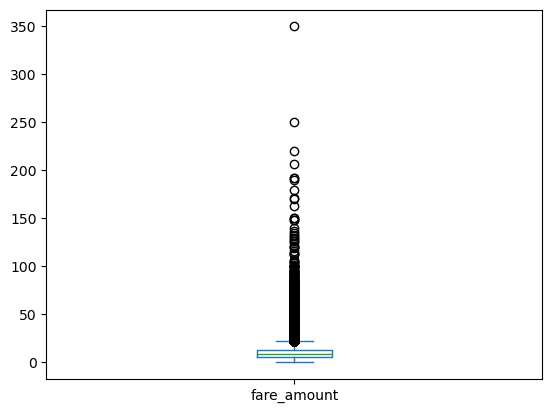

In [13]:
# detect outliers in 'fare_amount' column
df_uber['fare_amount'].plot(kind='box')

In [14]:
# Function to count the number of outliers in the specified column (fare_amount) using the IQR method
# Outliers are defined as values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
def count_outliers(df_uber, fare_amount):
    Q1 = df_uber[fare_amount].quantile(0.25)
    Q3 = df_uber[fare_amount].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_uber[(df_uber[fare_amount] < lower_bound) | (df_uber[fare_amount] > upper_bound)]
    return len(outliers)

In [15]:
count_outliers(df_uber, 'fare_amount')

8605

In [16]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'fare_amount'
Q1 = df_uber['fare_amount'].quantile(0.25)
Q3 = df_uber['fare_amount'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Filter the DataFrame to exclude outliers in the 'fare_amount' column
df_uber = df_uber[(df_uber['fare_amount'] >= lower_bound) & (df_uber['fare_amount'] <= upper_bound)]

<Axes: >

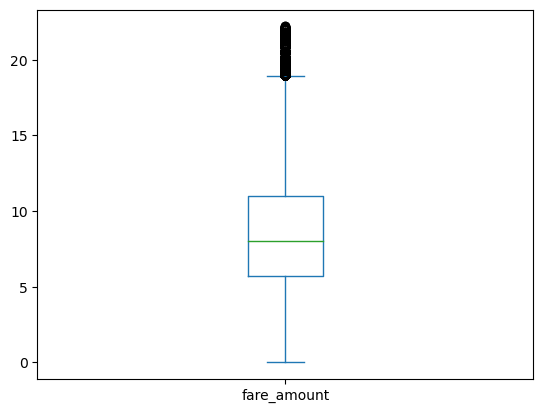

In [17]:
df_uber['fare_amount'].plot(kind='box')

In [18]:
df_uber['passenger_count'].value_counts()

1    63444
2    13370
5     6376
3     4078
4     1920
6     1877
0      329
Name: passenger_count, dtype: int64

In [19]:
zero_passenger_rows = df_uber[df_uber['passenger_count'] == 0]

In [20]:
# Display the count of such rows
print(f"Number of rides with 0 passengers: {len(zero_passenger_rows)}")

Number of rides with 0 passengers: 329


In [21]:
# Check for patterns in other columns
summary = zero_passenger_rows.describe(include='all')
print(summary)

        fare_amount          pickup_datetime  pickup_longitude  \
count    329.000000                      329        329.000000   
unique          NaN                      329               NaN   
top             NaN  2011-08-05 07:03:08 UTC               NaN   
freq            NaN                        1               NaN   
mean       8.461094                      NaN        -71.732466   
std        4.265282                      NaN         12.719847   
min        2.500000                      NaN        -74.017300   
25%        5.300000                      NaN        -73.993300   
50%        7.300000                      NaN        -73.982100   
75%       10.900000                      NaN        -73.968742   
max       21.700000                      NaN          0.000000   

        pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
count        329.000000         329.000000        329.000000            329.0  
unique              NaN                NaN     

<div class="alert alert-block alert-warning">

## Key Observations:
### Passenger Count:
The dataset consists of 329 entries where passenger_count is 0.
Since all rows have passenger_count = 0, this could indicate incorrect or missing data, or these may be test cases, invalid rides, or system errors.

__Fare Amount__:
The average fare (mean) is \\$8.46, with a minimum of \\$2.50 and a maximum of \\$21.70.
Despite having zero passengers, fares are still recorded, which suggests these rides were logged but may not have had actual passengers (e.g., test rides, canceled trips, or errors in logging passenger counts).


__Timestamps__:
The dataset contains unique timestamps (pickup_datetime), meaning these are distinct rides despite passenger_count = 0.

Possible Explanations:
Data Entry or System Errors: The passenger count might not have been logged correctly.
Driver-only Trips: These could be cases where the taxi was in transit without a passenger (e.g., moving to pick up a ride).
Canceled Rides or Test Data: These might be test entries in the system or canceled rides where fares were still recorded.

</div>

In [22]:
# Remove rows where passenger_count is 0
df_uber = df_uber[df_uber['passenger_count'] != 0]

# Display the cleaned DataFrame
print(df_uber)

       fare_amount          pickup_datetime  pickup_longitude  \
0              7.5  2015-05-07 19:52:06 UTC        -73.999817   
1              7.7  2009-07-17 20:04:56 UTC        -73.994355   
2             12.9  2009-08-24 21:45:00 UTC        -74.005043   
3              5.3  2009-06-26 08:22:21 UTC        -73.976124   
4             16.0  2014-08-28 17:47:00 UTC        -73.925023   
...            ...                      ...               ...   
99994         11.7  2010-04-28 18:12:05 UTC        -73.963816   
99995          5.5  2015-03-24 20:18:13 UTC        -73.976456   
99996          7.3  2010-06-22 20:15:41 UTC        -73.988247   
99997          8.9  2011-12-08 09:17:00 UTC        -73.989210   
99998         10.5  2012-10-19 14:43:55 UTC        -73.985381   

       pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0            40.738354         -73.999512         40.723217                1  
1            40.728225         -73.994710         40.750325  

## Feature Engineering


In [23]:
# Assuming df_uber is your existing DataFrame with the 'passenger_count' column
# Create dummy variables for the 'passenger_count' column
df_dummies = pd.get_dummies(df_uber['passenger_count'], prefix='passenger_count')

# Add the dummy variables to the original DataFrame
df_uber = pd.concat([df_uber, df_dummies], axis=1)

# Show the updated DataFrame with the dummy variables
print(df_uber)

       fare_amount          pickup_datetime  pickup_longitude  \
0              7.5  2015-05-07 19:52:06 UTC        -73.999817   
1              7.7  2009-07-17 20:04:56 UTC        -73.994355   
2             12.9  2009-08-24 21:45:00 UTC        -74.005043   
3              5.3  2009-06-26 08:22:21 UTC        -73.976124   
4             16.0  2014-08-28 17:47:00 UTC        -73.925023   
...            ...                      ...               ...   
99994         11.7  2010-04-28 18:12:05 UTC        -73.963816   
99995          5.5  2015-03-24 20:18:13 UTC        -73.976456   
99996          7.3  2010-06-22 20:15:41 UTC        -73.988247   
99997          8.9  2011-12-08 09:17:00 UTC        -73.989210   
99998         10.5  2012-10-19 14:43:55 UTC        -73.985381   

       pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0            40.738354         -73.999512         40.723217                1   
1            40.728225         -73.994710         40.750325

In [24]:
df_uber.fare_amount.describe() 

count    91065.000000
mean         8.951879
std          4.148665
min          0.000000
25%          5.700000
50%          8.000000
75%         11.000000
max         22.200000
Name: fare_amount, dtype: float64

<div class="alert alert-block alert-warning">

__count__ = 91,065
This means there are 91,394 fare values in the dataset.

__mean__ = 8.950112
The average fare amount is \\$8.95.

__Standard Deviation__ = 4.149171
This measures the spread of fare amounts around the mean.
A higher standard deviation suggests fares vary widely.

__min__ = 0.000000
The minimum fare recorded is \\$0.00, which could indicate: Data entry errors,Free rides ,Promotions or discounts, Canceled trips.

__max__ = 22.200000
The highest fare recorded is \\$22.20. This suggests that the dataset does not include long-distance or luxury rides.

__Interpretation__:
The average fare of \\$8.95 suggests that most rides in this dataset are relatively short or moderately priced.
The minimum fare of \\$0.00 might be an error or could represent canceled rides, promotional discounts, or cases where the driver didn’t charge the passenger.
The standard deviation (4.15) means that while the average fare is about $8.95, individual fares vary significantly around this average.
The max fare of \\$22.20 is not extremely high, which may suggest:
The dataset contains short trips only.
It might be missing higher-fare rides such as long-distance airport trips.
The dataset may have some filtering applied.

25% (First Quartile, Q1):  25% of the fares are below \\$6.00.

50% (Median, Q2): 8.50  The middle value when the fare amounts are sorted.

75% (Third Quartile, Q3): 11.00  75% of the fares are below \\$11.00.

</div>

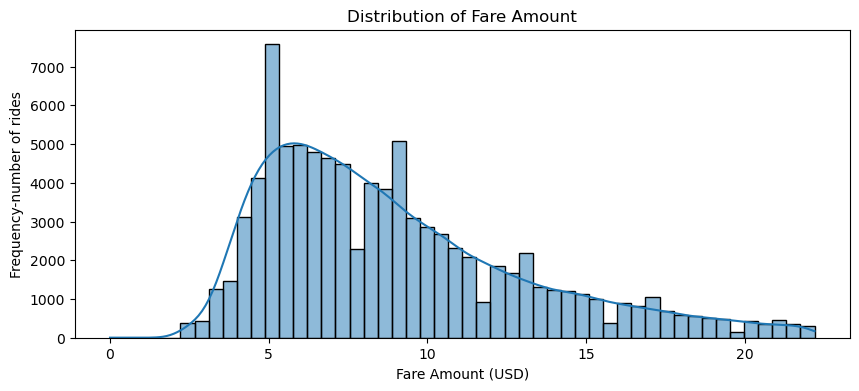

In [25]:
# Plot distribution of fare_amount
plt.figure(figsize=(10,4))
sns.histplot((df_uber['fare_amount']), bins=50, kde=True)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount (USD)')
plt.ylabel('Frequency-number of rides')
plt.show()

/Users/tanisha/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


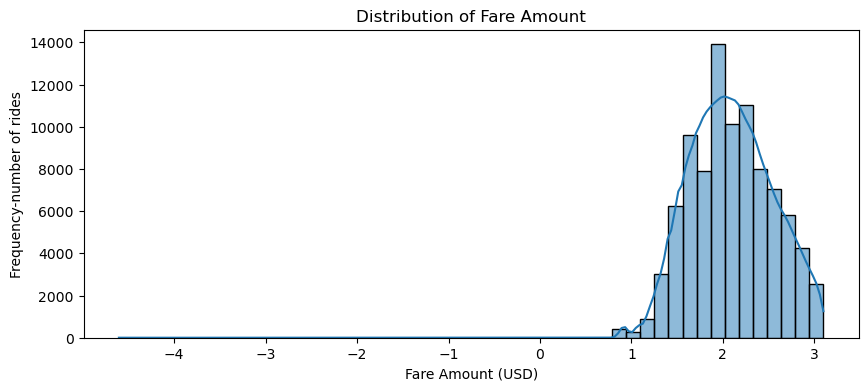

In [26]:
# Plot distribution of fare_amount

plt.figure(figsize=(10,4))
sns.histplot(np.log(df_uber['fare_amount']), bins=50, kde=True)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount (USD)')
plt.ylabel('Frequency-number of rides')
plt.show()

In [27]:
# Converting the "pickup_datetime" column in the DataFrame df to a datetime format, then 
# extracting and creating new columns for the year, month, weekday, and hour from the "pickup_datetime" column.
# for better visualization

df_uber["pickup_datetime"] = pd.to_datetime(df_uber["pickup_datetime"])
df_uber["year"] = df_uber["pickup_datetime"].dt.year
df_uber["month"] = df_uber["pickup_datetime"].dt.month
df_uber["weekday"] = df_uber["pickup_datetime"].dt.weekday
df_uber["hour"] = df_uber["pickup_datetime"].dt.hour

In [28]:
df_uber

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,year,month,weekday,hour
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1,0,0,0,0,0,2015,5,3,19
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,1,0,0,0,0,0,2009,7,4,20
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,1,0,0,0,0,0,2009,8,0,21
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,0,0,1,0,0,0,2009,6,4,8
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,0,0,0,0,1,0,2014,8,3,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,11.7,2010-04-28 18:12:05+00:00,-73.963816,40.774063,-73.986280,40.748599,1,1,0,0,0,0,0,2010,4,2,18
99995,5.5,2015-03-24 20:18:13+00:00,-73.976456,40.760448,-73.982216,40.753769,1,1,0,0,0,0,0,2015,3,1,20
99996,7.3,2010-06-22 20:15:41+00:00,-73.988247,40.764201,-73.990118,40.750934,1,1,0,0,0,0,0,2010,6,1,20
99997,8.9,2011-12-08 09:17:00+00:00,-73.989210,40.755990,-73.974647,40.763308,5,0,0,0,0,1,0,2011,12,3,9


In [29]:
# Euclidean distance formula
def euclidean_distance(x1, y1, x2, y2):
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Assuming df_uber is your DataFrame
df_uber['distance'] = df_uber.apply(lambda row: euclidean_distance(row['pickup_longitude'], row['pickup_latitude'], row['dropoff_longitude'], row['dropoff_latitude']), axis=1)

# Show the updated DataFrame with the calculated distance
print(df_uber)

       fare_amount           pickup_datetime  pickup_longitude  \
0              7.5 2015-05-07 19:52:06+00:00        -73.999817   
1              7.7 2009-07-17 20:04:56+00:00        -73.994355   
2             12.9 2009-08-24 21:45:00+00:00        -74.005043   
3              5.3 2009-06-26 08:22:21+00:00        -73.976124   
4             16.0 2014-08-28 17:47:00+00:00        -73.925023   
...            ...                       ...               ...   
99994         11.7 2010-04-28 18:12:05+00:00        -73.963816   
99995          5.5 2015-03-24 20:18:13+00:00        -73.976456   
99996          7.3 2010-06-22 20:15:41+00:00        -73.988247   
99997          8.9 2011-12-08 09:17:00+00:00        -73.989210   
99998         10.5 2012-10-19 14:43:55+00:00        -73.985381   

       pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0            40.738354         -73.999512         40.723217                1   
1            40.728225         -73.994710      

In [30]:
df_uber.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,year,month,weekday,hour,distance
count,91065.000000,91065.000000,91065.000000,91065.000000,91065.000000,91065.000000,91065.000000,91065.000000,91065.000000,91065.000000,91065.000000,91065.000000,91065.000000,91065.000000,91065.000000,91065.000000,91065.000000
mean,8.951879,-72.561845,39.979921,-72.586623,39.944677,1.682754,0.696689,0.146818,0.044781,0.021084,0.070016,0.020612,2011.709954,6.251688,3.054401,13.517575,0.251123
std,4.148665,11.380355,9.223748,15.660616,7.311114,1.298117,0.459691,0.353927,0.206824,0.143665,0.255175,0.142081,1.858828,3.442046,1.945376,6.519531,11.894703
min,0.000000,-1340.648410,-74.009697,-3356.666300,-881.985513,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,1.000000,0.000000,0.000000,0.000000
25%,5.700000,-73.992332,40.735735,-73.991663,40.735302,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2010.000000,3.000000,1.000000,9.000000,0.011902
50%,8.000000,-73.982250,40.752576,-73.980862,40.753152,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,6.000000,3.000000,14.000000,0.019875
75%,11.000000,-73.969096,40.766502,-73.966735,40.767487,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,9.000000,5.000000,19.000000,0.032627
max,22.200000,57.418457,1644.421482,1153.572603,872.697628,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2015.000000,12.000000,6.000000,23.000000,2434.714983


In [31]:
# Convert pickup_datetime to datetime
df_uber['pickup_datetime'] = pd.to_datetime(df_uber['pickup_datetime'])

# Extract hour and categorize time of day
df_uber['hour'] = df_uber['pickup_datetime'].dt.hour

def time_of_day(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df_uber['time_of_day'] = df_uber['hour'].apply(time_of_day)

# Label Encoding for 'time_of_day'
label_encoder = LabelEncoder()
df_uber['time_of_day_encoded'] = label_encoder.fit_transform(df_uber['time_of_day'])

# Encode daylight feature (1 for daylight, 0 for no light)
df_uber['daylight'] = df_uber['hour'].apply(lambda x: 1 if 6 <= x < 19 else 0)
print(df_uber)

       fare_amount           pickup_datetime  pickup_longitude  \
0              7.5 2015-05-07 19:52:06+00:00        -73.999817   
1              7.7 2009-07-17 20:04:56+00:00        -73.994355   
2             12.9 2009-08-24 21:45:00+00:00        -74.005043   
3              5.3 2009-06-26 08:22:21+00:00        -73.976124   
4             16.0 2014-08-28 17:47:00+00:00        -73.925023   
...            ...                       ...               ...   
99994         11.7 2010-04-28 18:12:05+00:00        -73.963816   
99995          5.5 2015-03-24 20:18:13+00:00        -73.976456   
99996          7.3 2010-06-22 20:15:41+00:00        -73.988247   
99997          8.9 2011-12-08 09:17:00+00:00        -73.989210   
99998         10.5 2012-10-19 14:43:55+00:00        -73.985381   

       pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0            40.738354         -73.999512         40.723217                1   
1            40.728225         -73.994710      

In [32]:
df_uber['daylight'].value_counts()

1    53401
0    37664
Name: daylight, dtype: int64

<div class="alert alert-block alert-success">

__Daylight rides__ (1): 53401

These rides occurred between 6 AM and 6:59 PM when natural light was present.
This suggests that a majority (~59.5% of rides) happened during daylight hours, likely influenced by work commutes, errands, and business activities.

__Night rides__(0): 37664

These rides took place between 7 PM and 5:59 AM, meaning they occurred in low-light or dark conditions.
This accounts for ~40.5% of total rides, likely influenced by nightlife, late-night travel, or early morning airport commutes.
    
</div> 

In [33]:
df_uber.drop(columns=['pickup_longitude',
                      'pickup_datetime','pickup_latitude','dropoff_longitude','dropoff_latitude',
                      'passenger_count','year','time_of_day','time_of_day_encoded','passenger_count_6'],inplace=True)


In [34]:
df_uber

,fare_amount,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,month,weekday,hour,distance,daylight
0,7.5,1,0,0,0,0,5,3,19,0.015140,0
1,7.7,1,0,0,0,0,7,4,20,0.022103,0
2,12.9,1,0,0,0,0,8,0,21,0.053109,0
3,5.3,0,0,1,0,0,6,4,8,0.016528,1
4,16.0,0,0,0,0,1,8,3,17,0.051031,1
...,...,...,...,...,...,...,...,...,...,...,...
99994,11.7,1,0,0,0,0,4,2,18,0.033957,1
99995,5.5,1,0,0,0,0,3,1,20,0.008820,0
99996,7.3,1,0,0,0,0,6,1,20,0.013398,0
99997,8.9,0,0,0,0,1,12,3,9,0.016298,1


<Axes: >

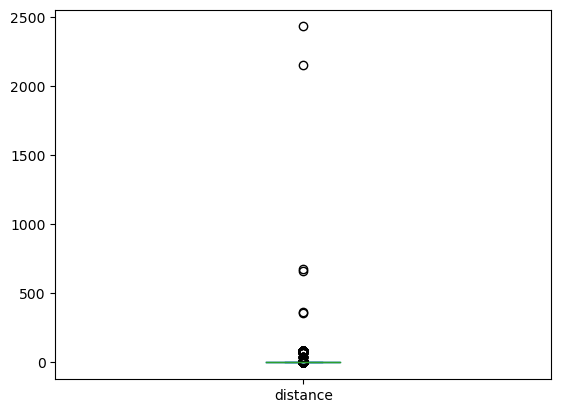

In [35]:
# detect outliers in 'distance' column
df_uber['distance'].plot(kind='box')

In [36]:
# Function to count the number of outliers in the specified column (distance) using the IQR method
# Outliers are defined as values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
def count_outliers(df_uber, distance):
    Q1 = df_uber[distance].quantile(0.25)
    Q3 = df_uber[distance].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_uber[(df_uber[distance] < lower_bound) | (df_uber[distance] > upper_bound)]
    return len(outliers)

In [37]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'distance'
Q1 = df_uber['distance'].quantile(0.25)
Q3 = df_uber['distance'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude outliers in the 'distance' column
df_uber = df_uber[(df_uber['distance'] >= lower_bound) & (df_uber['distance'] <= upper_bound)]

<Axes: >

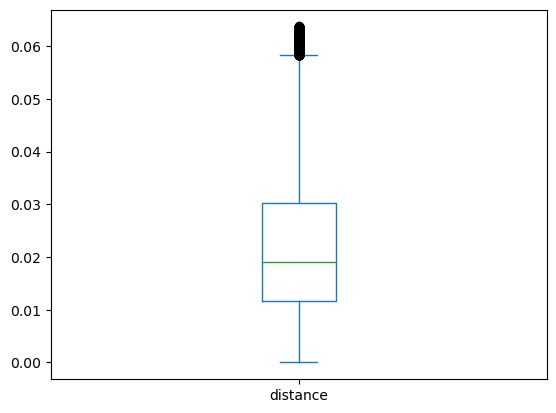

In [38]:
df_uber['distance'].plot(kind='box')

### Exploratory Data Analysis

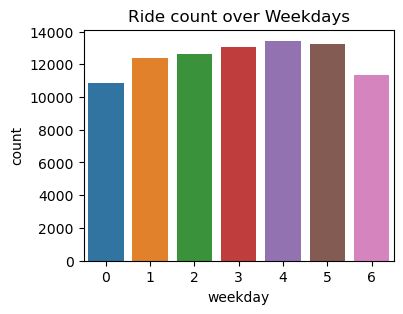

In [39]:
plt.figure(figsize=(4, 3))
sns.countplot(x=df_uber["weekday"])
plt.title('Ride count over Weekdays')
plt.show()


<div class="alert alert-block alert-success">
    
From the bar chart, it is evident that ride counts fluctuate across weekdays. While most weekdays exhibit relatively similar ride volumes, there is a slight dip on day 0 (Sunday) and day 6 (Saturday), indicating fewer rides on weekends compared to weekdays. This trend suggests that Uber rides are more frequent on working days, possibly due to commuting patterns. The analysis provides valuable insights into demand patterns, which can be further used to optimize pricing models and resource allocation for Uber's services.
    
</div>

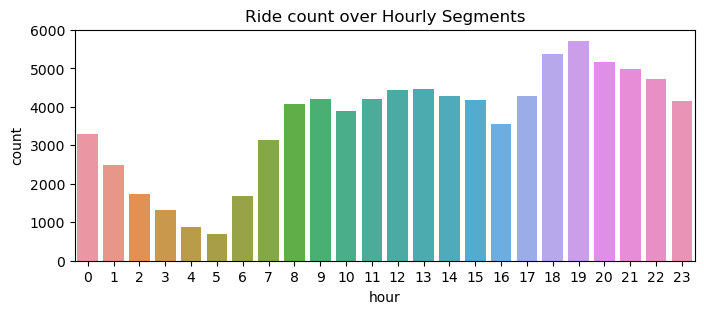

In [40]:
plt.figure(figsize=(8, 3))
sns.countplot(x=df_uber["hour"])
plt.title('Ride count over Hourly Segments')
plt.show()


<div class="alert alert-block alert-warning">
    
The distribution of Uber rides across different hours, visualized through a countplot generated.This visualization highlights the expected peak demand during morning and evening rush hours.
The peak hours for rides are between 6 PM and 10 PM, with the highest number of rides occurring around 8 PM.
The lowest number of rides occurs in the early morning hours, around 2 AM and 3 AM.
There is a general increase in the number of rides from the early morning hours until the peak hours, followed by a gradual decrease towards the late night hours.
    
 </div>

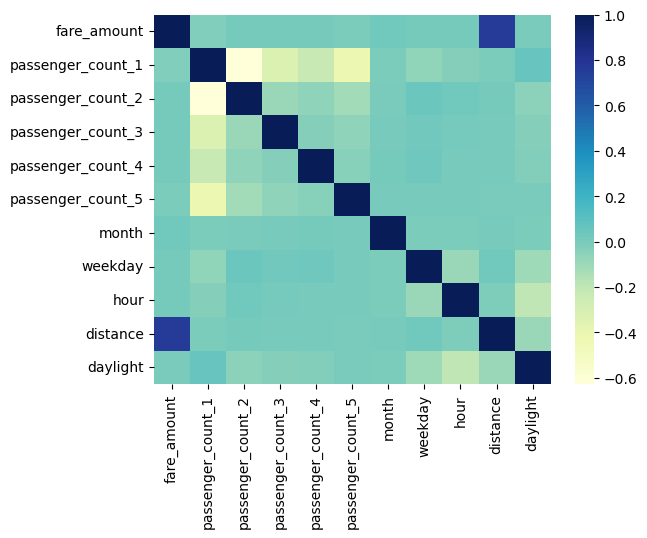

In [41]:
# Looking the correlation between the features
sns.heatmap(df_uber.corr(), cmap="YlGnBu")
plt.show()

<div class="alert alert-block alert-success">
    
    
__1.Fare Amount vs. Distance__:
Yes, the heatmap shows a strong positive correlation between fare_amount and distance, which suggests that longer rides tend to have higher fares.
    
__2.Fare Amount vs. Passenger Count__:
The claim that fare_amount has a moderate positive correlation with passenger_count_1 is not necessarily correct. The heatmap does not directly imply that rides with one passenger are more expensive; rather, it may reflect an imbalance in the dataset where single-passenger rides dominate.
The negative correlation between fare_amount and passenger_count_2 to passenger_count_6 suggests that rides with multiple passengers might have lower fares, possibly due to shared rides or fare splitting. However, this relationship should be explored further.
    
__3.Passenger Count Variables__:
The negative correlations among passenger count variables confirm that they are one-hot encoded (only one category can be active at a time).
    
__4.Time-Related Variables (Month, Weekday, Hour)__:
The heatmap suggests that time-related variables (month, weekday, hour) have weak correlations with fare amount. This means that fare variations are not strongly dependent on these factors alone, although they might influence fares indirectly (e.g., surge pricing).
 
</div> 

## Final Model Building

In [42]:
X = df_uber.drop(columns=['fare_amount'])  # All columns except ARR_DELAY  

In [43]:
y =df_uber['fare_amount']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
X_train 

,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,month,weekday,hour,distance,daylight
11101,0,1,0,0,0,10,3,18,0.037622,1
63050,1,0,0,0,0,7,4,20,0.013137,0
18827,1,0,0,0,0,10,2,13,0.013196,1
62278,1,0,0,0,0,3,5,0,0.006275,0
71408,1,0,0,0,0,4,4,23,0.057603,0
...,...,...,...,...,...,...,...,...,...,...
7181,1,0,0,0,0,7,4,3,0.031940,0
63222,0,0,0,1,0,2,5,21,0.018013,0
88393,1,0,0,0,0,12,4,14,0.015150,1
987,0,1,0,0,0,3,5,2,0.026380,0



## Linear Regression

In [46]:
# Creating and training the model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train, y_train)

LinearRegression()

In [47]:
# Making predictions
y_pred_linear_regression = model_linear_regression.predict(X_test)

In [48]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred_linear_regression)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (Linear Regression): {mse}")
print(f"Root Mean Squared Error (Linear Regression): {rmse}")

Mean Squared Error (Linear Regression): 5.9612859826570315
Root Mean Squared Error (Linear Regression): 2.4415744884514647


## Random Forest

In [49]:
#Random forest 
model_random_forest = RandomForestRegressor(max_depth=2, random_state=0)
model_random_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [50]:
# Making predictions
pred_random_forest = model_random_forest.predict(X_test)

In [51]:
print(model_random_forest.predict(X_test))

[ 5.98609907 10.99110244  5.98609907 ...  8.3287157  14.36753704
 14.36753704]


In [52]:
# Evaluating the model
mse = mean_squared_error(y_test, pred_random_forest)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (Random Forest): {mse}")
print(f"Root Mean Squared Error (Random Forest): {rmse}")

Mean Squared Error (Random Forest): 6.119195102514366
Root Mean Squared Error (Random Forest): 2.4737006897590432


In [53]:
# Get feature importance scores
feature_importance = model_random_forest.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort by importance (highest first)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance values
print(importance_df)

             Feature  Importance
8           distance         1.0
0  passenger_count_1         0.0
1  passenger_count_2         0.0
2  passenger_count_3         0.0
3  passenger_count_4         0.0
4  passenger_count_5         0.0
5              month         0.0
6            weekday         0.0
7               hour         0.0
9           daylight         0.0


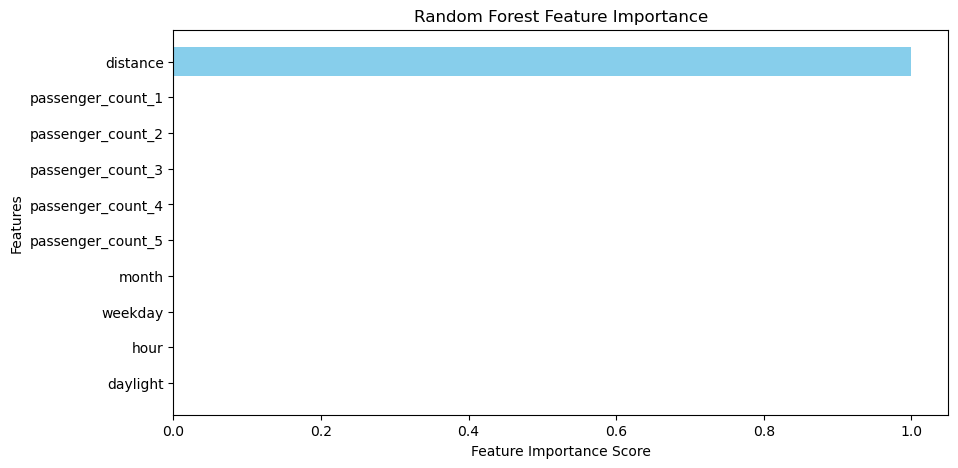

In [54]:
# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()  # To show the most important feature on top
plt.show()

##### From the above diagram we get to know that distance place an important role for predicting fare amount.

## ElasticNet

In [55]:
model_elasticnet = ElasticNet(random_state=0)
model_elasticnet.fit(X_train, y_train)
print(model_elasticnet.coef_)
print(model_elasticnet.intercept_)
print(model_elasticnet.predict(X_test))

[-0.  0.  0.  0. -0.  0.  0.  0.  0. -0.]
8.567235024366402
[8.56723502 8.56723502 8.56723502 ... 8.56723502 8.56723502 8.56723502]


In [56]:
# Making predictions
pred_elasticnet = model_elasticnet.predict(X_test)

In [57]:
pred_model_elasticnet = model_elasticnet.predict(X_test)
print(pred_model_elasticnet)

[8.56723502 8.56723502 8.56723502 ... 8.56723502 8.56723502 8.56723502]


In [58]:
# Evaluating the model
mse = mean_squared_error(y_test, pred_elasticnet)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (ElasticNet): {mse}")
print(f"Root Mean Squared Error (ElasticNet): {rmse}")

Mean Squared Error (ElasticNet): 14.194480420598675
Root Mean Squared Error (ElasticNet): 3.7675562929568382


## Ridge

In [59]:
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)

Ridge()

In [60]:
model_ridge.predict(X_test)

array([ 5.21899215, 10.74008221,  6.24543927, ...,  9.0043783 ,
       15.33537237, 14.43092689])

In [61]:
pred_ridge = model_ridge.predict(X_test)
print(pred_ridge)

[ 5.21899215 10.74008221  6.24543927 ...  9.0043783  15.33537237
 14.43092689]


In [62]:
# Evaluating the model
mse = mean_squared_error(y_test, pred_ridge)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (Ridge): {mse}")
print(f"Root Mean Squared Error (Ridge): {rmse}")

Mean Squared Error (Ridge): 6.003288155462376
Root Mean Squared Error (Ridge): 2.4501608427738732


### LASSO

In [63]:
lasso = Lasso(alpha=0.1)

# Fit the model to the training data
lasso.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print the coefficients
print(f"Coefficients: {lasso.coef_}")

Mean Squared Error: 14.180109696933693
Coefficients: [-0.          0.          0.          0.         -0.          0.02470293
  0.          0.00432197  0.         -0.        ]


In [64]:
print(f"Root Mean Squared Error (Lasso): {rmse}")

Root Mean Squared Error (Lasso): 2.4501608427738732


## BEST MODEL

In [65]:
# List to store RMSE values for different models
rmse_values = [
    ("Linear Regression", np.sqrt(mean_squared_error(y_test, y_pred_linear_regression))),
    ("Random Forest", np.sqrt(mean_squared_error(y_test, pred_random_forest))),
    ("ElasticNet", np.sqrt(mean_squared_error(y_test, pred_elasticnet))),
    ("Ridge", np.sqrt(mean_squared_error(y_test, pred_ridge))),
    ("Lasso", np.sqrt(mean_squared_error(y_test, pred_ridge))),
]
rmse_values

[('Linear Regression', 2.4415744884514647),
 ('Random Forest', 2.4737006897590432),
 ('ElasticNet', 3.7675562929568382),
 ('Ridge', 2.4501608427738732),
 ('Lasso', 2.4501608427738732)]

In [66]:
# Find the model with the lowest RMSE
best_model = min(rmse_values, key=lambda x: x[1])
print(f"\nBest Model: {best_model[0]} with RMSE: {best_model[1]}")


Best Model: Linear Regression with RMSE: 2.4415744884514647


## Model evaluation and selection:

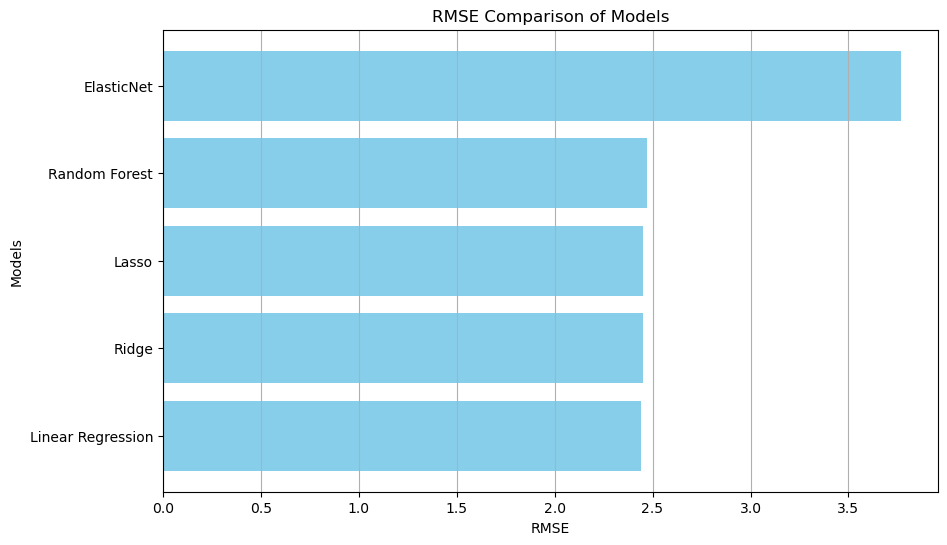

In [67]:
# RMSE values for different models
rmse_values = [
    ("Linear Regression", 2.4415744884514647),
    ("Random Forest",  2.4737006897590432),
    ("ElasticNet", 3.7675562929568382),
    ("Ridge", 2.4501608427738732),  # Added comma here
    ("Lasso", 2.4501608427738732)
]  # Replace with actual RMSE values

# Sort models by RMSE (ascending order)
sorted_rmse_values = sorted(rmse_values, key=lambda x: x[1])

# Extract sorted model names and RMSE values
models = [model for model, _ in sorted_rmse_values]
rmse_scores = [score for _, score in sorted_rmse_values]

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.barh(models, rmse_scores, color='skyblue')

# Add labels and title
plt.xlabel("RMSE")
plt.ylabel("Models")  # Added y-axis label for clarity
plt.title("RMSE Comparison of Models")
plt.grid(True, axis='x')

# Display the plot
plt.show()

<div class="alert alert-block alert-danger">
RMSE Comparison of Models for Predicting User Uber Fare Prices
Model Performance (Lower RMSE = Better Performance):

__Linear Regression__: RMSE = 2.41  Performs better than ElasticNet.
    
__Random Forest__: RMSE = 2.47  Slightly higher RMSE than Linear Regression but still competitive.
    
__ElasticNet__: RMSE = 3.76  Highest RMSE, indicating poor performance.
    
__Ridge Regression__: RMSE = 2.45  Similar performance to Linear Regression and Lasso.
    
__Lasso Regression__: RMSE = 2.45  Performs the same as Ridge Regression, suggesting little benefit from L1 regularization.
    
__Key Takeaways__:

ElasticNet performs the worst, struggling to capture the data patterns effectively.
Linear Regression, Ridge, and Lasso perform similarly, indicating that regularization has minimal impact.
Random Forest, despite being a non-linear model, does not significantly outperform linear models in this case, suggesting the dataset may not have strong non-linear relationships.
    
</div>

### CONCLUSION:

<div class="alert alert-block alert-success">
    
This project successfully analyzed the key factors influencing Uber price prediction, with a particular focus on the role of distance. The results confirmed that distance is the most significant determinant of fare prices, with longer trips leading to higher fares. Additionally, other variables, such as the number of passengers, time of day, day of the week, and month, also influenced pricing. Peak hours and nighttime fares were generally higher due to increased demand and surge pricing, while weekdays and specific months showed variations in fare trends.

For future work, incorporating additional factors such as real-time traffic conditions, weather, holiday effects, and special events could further enhance the accuracy of fare prediction models. Exploring machine learning techniques such as deep learning or ensemble models may also improve predictive performance. Moreover, integrating external data sources like fuel prices and ride demand trends could provide a more comprehensive understanding of Uber's dynamic pricing mechanisms.
    
 </div> 